In [26]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import altair as alt
alt.data_transformers.disable_max_rows()

import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import act
import pyart

In [4]:
result_22_kps = act.discovery.download_noaa_psl_data(
    site='kps', instrument='Radar FMCW Moment', startdate='20220213', hour='22')
result_23_kps = act.discovery.download_noaa_psl_data(
    site='kps', instrument='Radar FMCW Moment', startdate='20220213', hour='23')

In [5]:
result_22_kps

['/Users/elischwat/Development/sos/analysis/kps_Radar_FMCW_Moment/dkps2204422a.mom',
 '/Users/elischwat/Development/sos/analysis/kps_Radar_FMCW_Moment/hkps2204422a.mom',
 '/Users/elischwat/Development/sos/analysis/kps_Radar_FMCW_Moment/kps2204422.raw']

In [6]:
# Read in the .raw file.  Spectra data are also downloaded
obj1_kps = act.io.noaapsl.read_psl_radar_fmcw_moment([result_22_kps[-1], result_23_kps[-1]])

# Read in the parsivel files from NOAA's webpage.
url = ['https://downloads.psl.noaa.gov/psd2/data/realtime/DisdrometerParsivel/Stats/kps/2022/044/kps2204422_stats.txt',
       'https://downloads.psl.noaa.gov/psd2/data/realtime/DisdrometerParsivel/Stats/kps/2022/044/kps2204423_stats.txt']
obj2_kps = act.io.noaapsl.read_psl_parsivel(url)



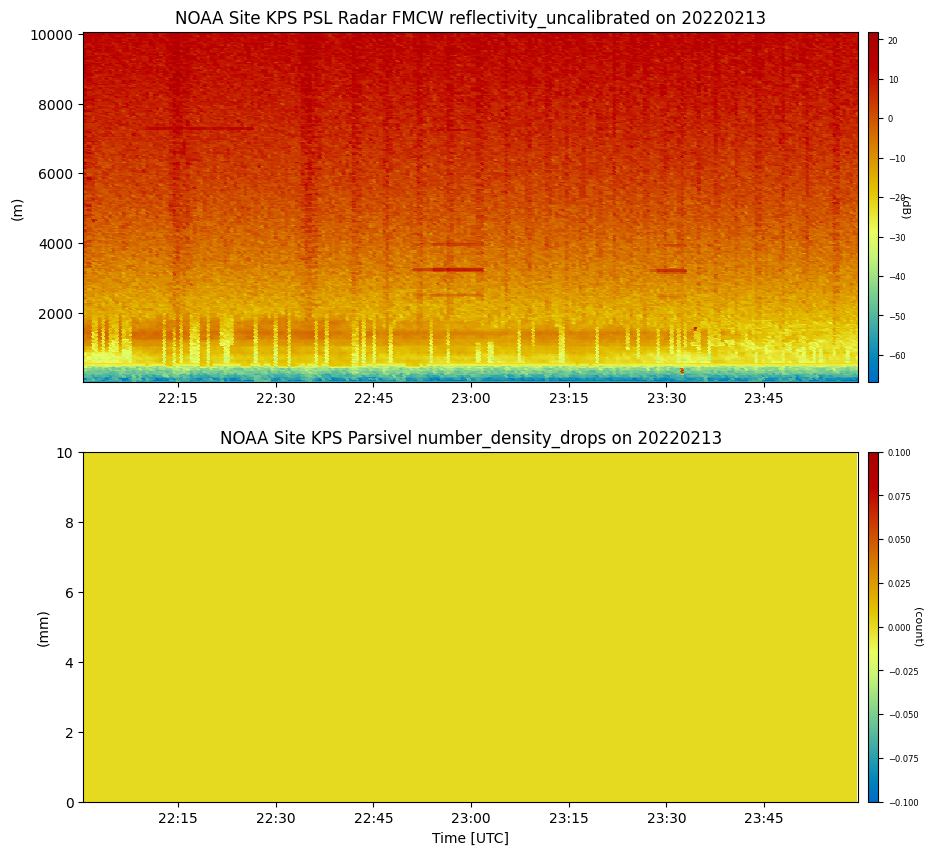

In [7]:
# First we plot the NOAA FMCW and parsivel from the KPS site

# Create display object with both datasets
display = act.plotting.TimeSeriesDisplay(
    {"NOAA Site KPS PSL Radar FMCW": obj1_kps, "NOAA Site KPS Parsivel": obj2_kps},
    subplot_shape=(2,), figsize=(10, 10))

# Plot the subplots
display.plot('reflectivity_uncalibrated', dsname='NOAA Site KPS PSL Radar FMCW',
             cmap='act_HomeyerRainbow', subplot_index=(0,))
display.plot('number_density_drops', dsname='NOAA Site KPS Parsivel',
             cmap='act_HomeyerRainbow', subplot_index=(1,))
# Set limits
display.axes[1].set_ylim([0, 10])
plt.show()



In [8]:
username = 'eschwat'
token = input()

In [9]:
#Specify datastream and date range for KAZR data
ds_kazr = 'guckazrcfrgeM1.a1'
startdate = '2022-02-13'
enddate = '2022-02-13'

# Data already retrieved, but showing code below on how to download the files.
act.discovery.download_data(username, token, ds_kazr, startdate, enddate)

# Index last 2 files for the 22:00 and 23:00 timeframe.
kazr_files = glob.glob(''.join(['./',ds_kazr,'/*nc']))
kazr_files[-2:]
kazr = act.io.armfiles.read_netcdf(kazr_files[-2:])

[DOWNLOADING] guckazrcfrgeM1.a1.20220213.000004.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.040003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.070000.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.020002.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.010004.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.030003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.050003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.060001.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.100000.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.135959.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.170002.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.155958.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.205959.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.110004.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.080004.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.090000.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.130005.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.120001.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20220213.150001.nc
[DOWNLOADING] guckazrcfrgeM1.a1

In [10]:
ds_ld = 'gucldM1.b1'

# Data already retrieved, but showing code below on how to download the files.
act.discovery.download_data(username, token, ds_ld, startdate, enddate)

# Index last 2 files for the 22:00 and 23:00 timeframe.
ld_files = glob.glob(''.join(['./',ds_ld,'/*cdf']))
ld = act.io.armfiles.read_netcdf(ld_files[0])



[DOWNLOADING] gucldM1.b1.20220213.000000.cdf


/var/folders/jy/xv6qnlms2cj_3p5yrzcwc0n00000gn/T/ipykernel_37622/2548965001.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  display.axes[0, 0].set_yticklabels(['0', '2', '4','6', '8', '10'])
/var/folders/jy/xv6qnlms2cj_3p5yrzcwc0n00000gn/T/ipykernel_37622/2548965001.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  display.axes[0, 1].set_yticklabels(['0', '2', '4','6', '8', '10'])


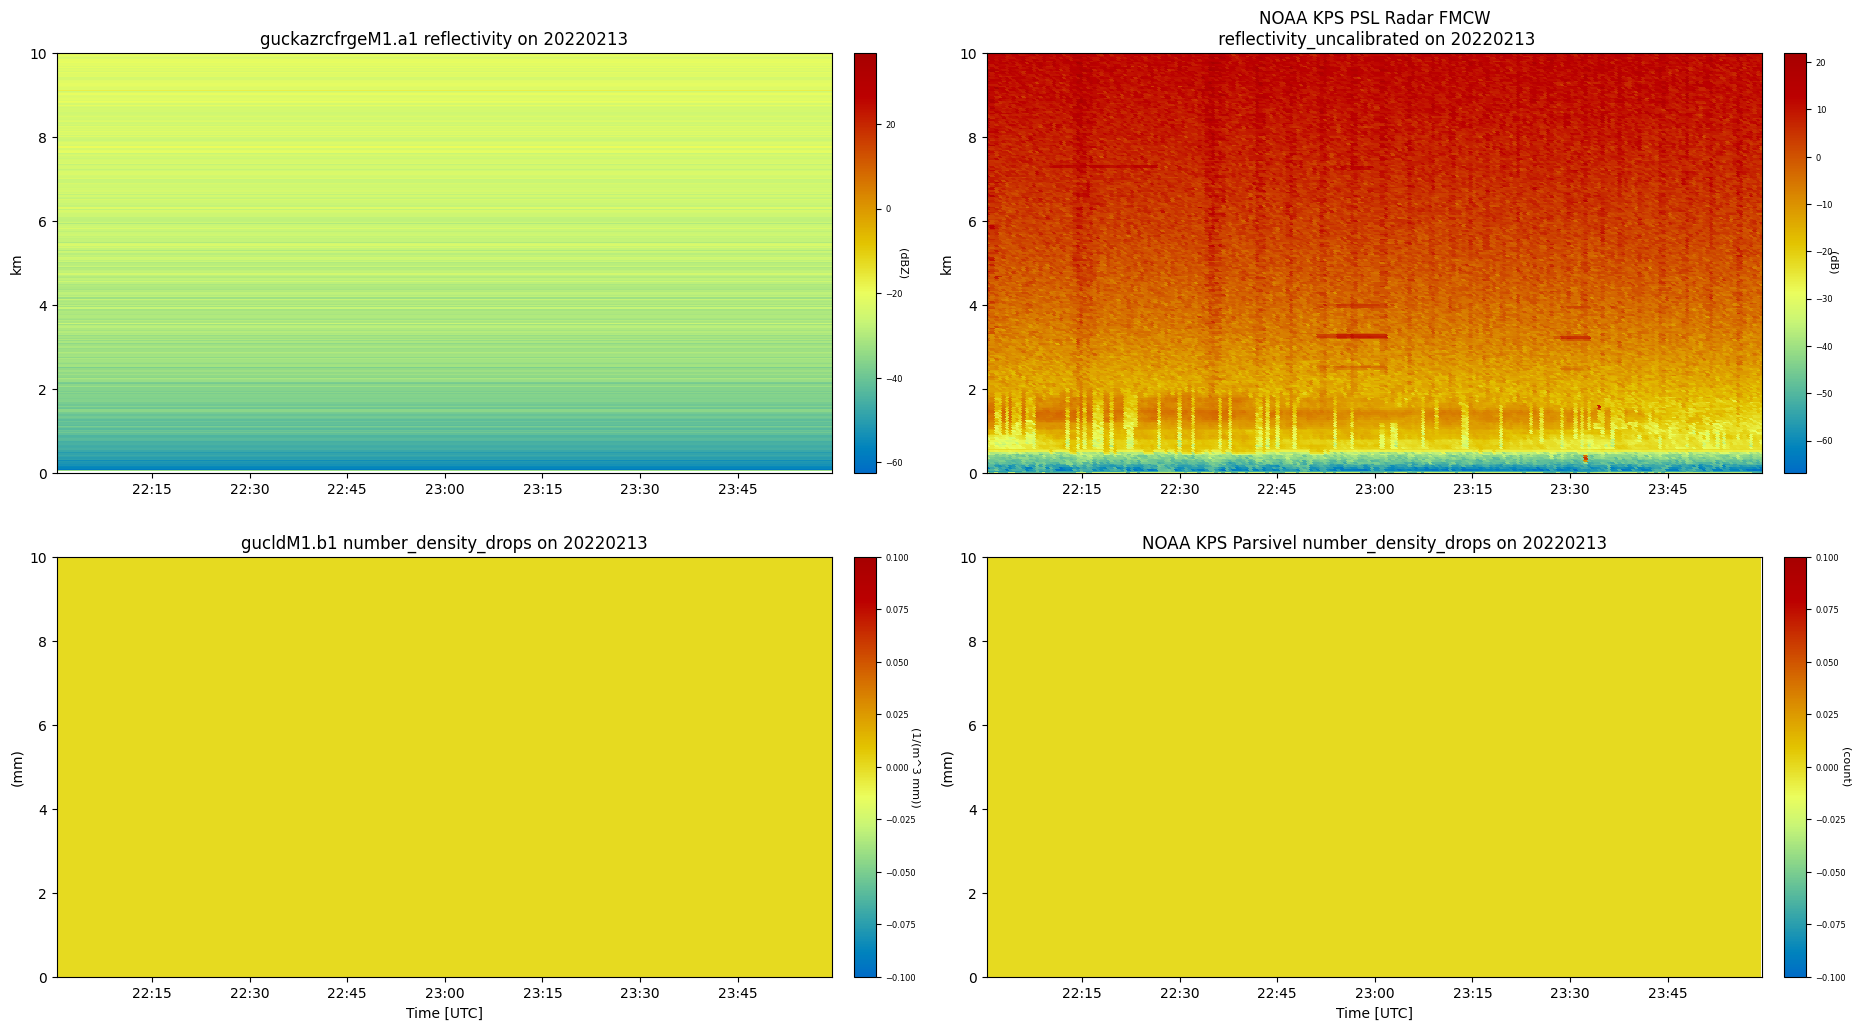

In [11]:
# We now want to plot and compare ARM and NOAA's instruments.

# Create a series display with all 4 datasets
display = act.plotting.TimeSeriesDisplay(
    {"NOAA KPS PSL Radar FMCW": obj1_kps, "NOAA KPS Parsivel": obj2_kps,
     "guckazrcfrgeM1.a1": kazr, 'gucldM1.b1': ld},
    subplot_shape=(2, 2), figsize=(22, 12))

# Set custom 2 line title for space
title = "NOAA KPS PSL Radar FMCW\n reflectivity_uncalibrated on 20220213"

# Plot the four subplots
display.plot('reflectivity_uncalibrated', dsname='NOAA KPS PSL Radar FMCW',
             cmap='act_HomeyerRainbow', set_title=title, subplot_index=(0, 1))
display.plot('number_density_drops', dsname='NOAA KPS Parsivel',
             cmap='act_HomeyerRainbow', subplot_index=(1, 1))
display.plot('reflectivity', dsname='guckazrcfrgeM1.a1',
             cmap='act_HomeyerRainbow', subplot_index=(0, 0))
display.plot('number_density_drops', dsname='gucldM1.b1',
             cmap='act_HomeyerRainbow', subplot_index=(1, 0))

# Update limits
display.axes[1, 0].set_ylim([0, 10])

display.axes[1, 1].set_ylim([0, 10])


display.axes[0, 0].set_ylim([0, 10000])
display.axes[0, 0].set_yticklabels(['0', '2', '4','6', '8', '10'])
display.axes[0, 0].set_ylabel('km')

display.axes[0, 1].set_ylim([0, 10000])
display.axes[0, 1].set_yticklabels(['0', '2', '4','6', '8', '10'])
display.axes[0, 1].set_ylabel('km')

plt.show()



In [17]:
#Specify datastream and date range for KAZR data - the original example from this NB
ds_dl = 'gucdlppiM1.b1'

# 3 datastreams mentioned by Dan Feldman
# ds_dl = 'gucdlrhi2M1.b1'
# ds_dl = 'gucdlrhiM1.b1'
# ds_dl = 'gucdlppiM1.b1'

# startdate = '2022-02-13'
# enddate = '2022-02-13'
startdate = '2022-02-06'
enddate = '2022-02-14'

act.discovery.download_data(username, token, ds_dl, startdate, enddate)

[DOWNLOADING] gucdlppiM1.b1.20220206.003003.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.014502.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.020022.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.004503.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.021502.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.033003.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.050022.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.041503.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.043003.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.054502.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.053003.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.063002.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.074502.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.000022.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.001502.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.010023.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.013002.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.030022.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.031502.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.040022.cdf
[DOWNLOADING] gucdlppiM1.b1.20220206.073

['/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.003003.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.014502.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.020022.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.004503.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.021502.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.033003.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.050022.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.041503.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.043003.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gucdlppiM1.b1.20220206.054502.cdf',
 '/Users/elischwat/Development/sos/analysis/gucdlppiM1.b1/gu

In [18]:
dl_ppi_files = glob.glob(''.join(['./',ds_dl,'/*cdf']))

# Index last 9 files for the 22:00 and 23:00 timeframe.
# dl_ppi = act.io.armfiles.read_netcdf(dl_ppi_files[-9:])

# Or use this?
dl_ppi = act.io.armfiles.read_netcdf(dl_ppi_files)

# Calculate the winds from the gucdlppi dataset.
wind_obj = act.retrievals.compute_winds_from_ppi(
    dl_ppi, remove_all_missing=True, snr_threshold=0.002)

In [95]:
len(wind_obj.to_dataframe().reset_index().to_pickle("kp_radar_windspeed.pickle"))

In [19]:
dl_ppi_files = glob.glob(''.join(['./',ds_dl,'/*cdf']))

# Index last 9 files for the 22:00 and 23:00 timeframe.
dl_ppi = act.io.armfiles.read_netcdf(dl_ppi_files[-9:])

# Or use this?
# dl_ppi = act.io.armfiles.read_netcdf(dl_ppi_files)

# Calculate the winds from the gucdlppi dataset.
wind_obj = act.retrievals.compute_winds_from_ppi(
    dl_ppi, remove_all_missing=True, snr_threshold=0.002)

In [20]:
len(wind_obj.to_dataframe().reset_index().to_pickle("kp_radar_windspeed.pickle"))

TypeError: object of type 'NoneType' has no len()

In [93]:
alt.Chart(
    wind_obj.to_dataframe().reset_index()
).transform_filter(alt.datum.height < 50).mark_line(point=True).encode(
    alt.X('time:T'),
    alt.Y('wind_direction:Q'),
    alt.Color('height:N'),
).properties(width=1000) & alt.Chart(
    wind_obj.to_dataframe().reset_index()
).transform_filter(alt.datum.height < 50).mark_line(point=Tårue).encode(
    alt.X('time:T'),
    alt.Y('wind_speed:Q'),
    alt.Color('height:N'),
).properties(width=1000)

/Users/elischwat/miniconda3/envs/arm/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.VConcatChart(...)

In [73]:
display.plot_barbs_from_spd_dir('wind_speed', 'wind_direction',
                                dsname='GUC DLPPI Computed Winds over KAZR',
                                invert_y_axis=False)

<AxesSubplot: title={'center': 'GUC DLPPI Computed Winds over KAZR on 20220213'}, xlabel='Time [UTC]', ylabel='(m)'>

In [76]:
spd = wind_obj['wind_speed']
dir = wind_obj['wind_direction']
tempu = -np.sin(np.deg2rad(dir)) * spd
tempv = -np.cos(np.deg2rad(dir)) * spd


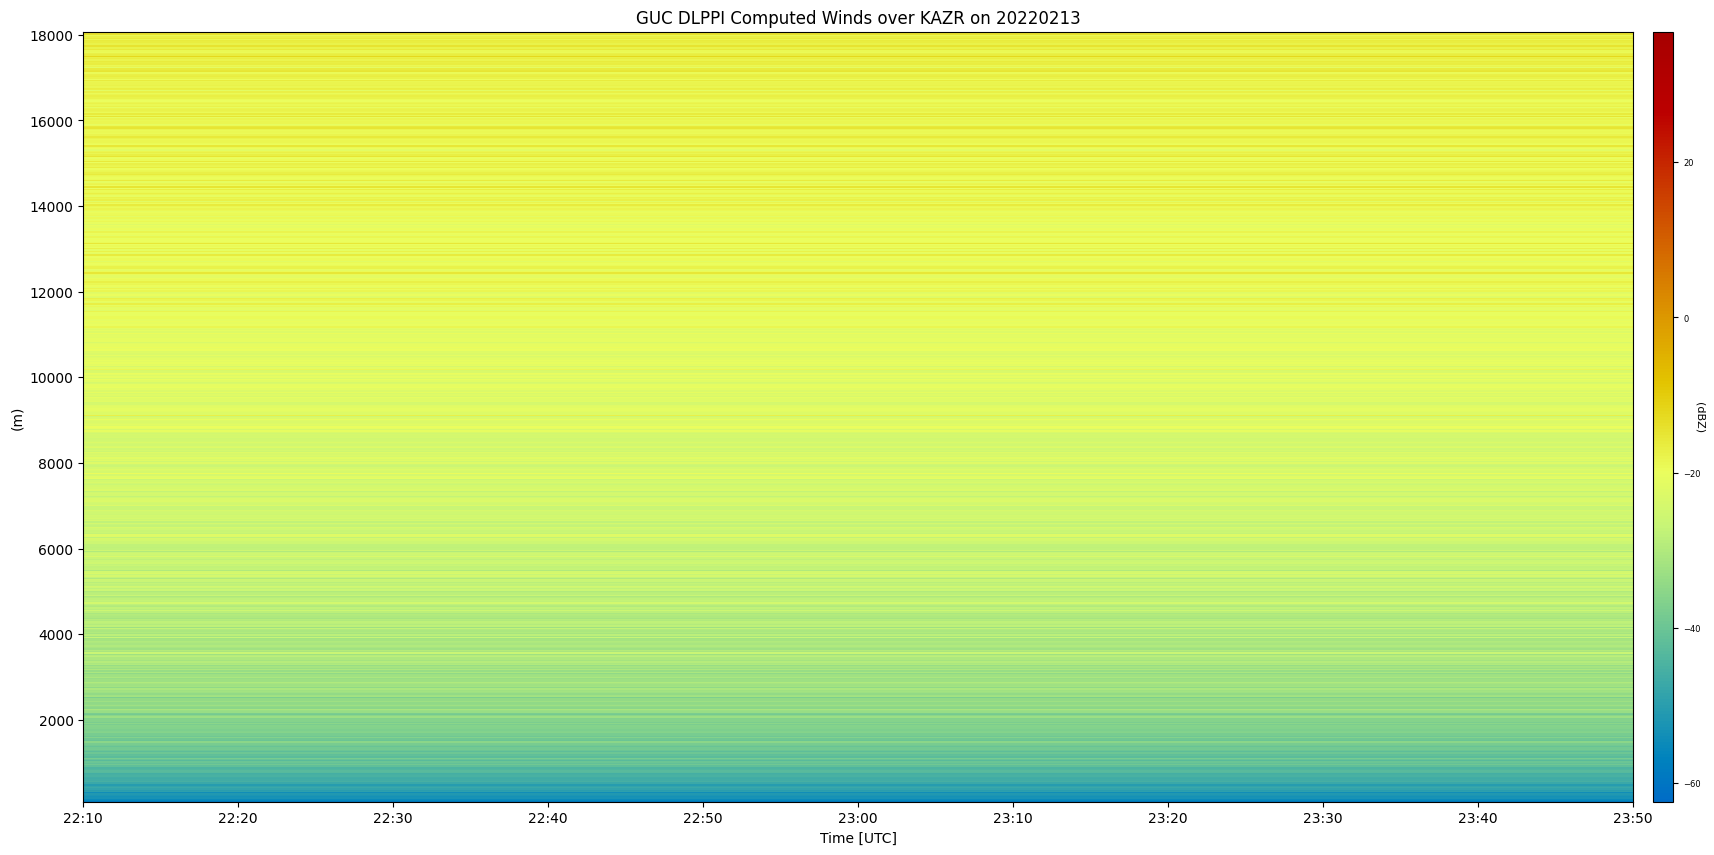

In [72]:
# Create a display object.
display = act.plotting.TimeSeriesDisplay(
    {"GUC DLPPI Computed Winds over KAZR": wind_obj,
     "guckazrcfrgeM1.a1": kazr,}, figsize=(20, 10))

# Plot the wind barbs overlayed on the KAZR reflectivity
display.plot('reflectivity', dsname='guckazrcfrgeM1.a1',
             cmap='act_HomeyerRainbow', 
            #  vmin=-20, 
            #  vmax=30
            )
display.plot_barbs_from_spd_dir('wind_speed', 'wind_direction',
                                dsname='GUC DLPPI Computed Winds over KAZR',
                                invert_y_axis=False)

# Update the x-limits to make sure both wind profiles are shown
display.axes[0].set_xlim([np.datetime64('2022-02-13T22:10'), np.datetime64('2022-02-13T23:50')])
plt.show()

In [21]:
import xarray

In [22]:
import netCDF4 as nc
fn = '/Volumes/noqc_geo/isfs_20221031.nc'
ds = nc.Dataset(fn)

In [27]:
import rioxarray as rix

ModuleNotFoundError: No module named 'rioxarray'

In [28]:
conda install -c conda-forge rioxarray

326364.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


         by the --apple-use-keychain and --apple-load-keychain
         flags, respectively.  To suppress this warning, set the
         environment variable APPLE_SSH_ADD_BEHAVIOR as described in
         the ssh-add(1) manual page.
Identity added: /Users/elischwat/.ssh/id_rsa (eli.l.schwat@gmail.com)
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 